Analyses properties of decorrelation and whitening methods for FC and Convolutional cases.

In [1]:
import numpy as np
import torch
from decorrelation.decorrelation import lower_triangular, Decorrelation, DecorConv2d # DecorrelationPatch2d # covariance, DecorrelationPatch2d, DecorrelationFC, lower_triangular
from decorrelation.plotting import *
from decorrelation.utils import generate_correlated_data

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
def train(num_epochs, data, model):

    # covariance matrix before training
    X = model.decorrelate(data).view(data.shape[0],-1)
    A1 = (X.T @ X) / len(X)

    # train decorrelator
    L = np.zeros(num_epochs)
    for epoch in range(num_epochs):
        model.forward(data)
        L[epoch] = model.update()
        print(f'epoch {epoch:<3}\tloss: {L[epoch]:3f}')

    # covariance matrix after training
    X = model.decorrelate(data).view(data.shape[0],-1)
    A2 = (X.T @ X) / len(X)

    return L, A1, A2

We start by showing effective decorrelation of correlated input

In [3]:
num_samples=1000
num_features=500
num_epochs=100
seed=42
decor_lr=1e-0
kappa=1e-1

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# generate correlated data
data = generate_correlated_data(num_features, num_samples).to(device)

# create a decorrelator
model = Decorrelation(in_features=num_features, decor_lr=decor_lr, kappa=kappa).to(device)

L, A1, A2 = train(num_epochs, data, model)

plot_decorrelation_results(model, L, A1, A2)
print(f'mean variance: {torch.mean(torch.diag(A2)):.2f}')


TypeError: Decorrelation.__init__() got an unexpected keyword argument 'bias_lr'

Show the same for learning a lower triangular matrix

epoch 0  	loss: 13494.123047
epoch 1  	loss: 975.036804
epoch 2  	loss: 337.490143
epoch 3  	loss: 201.393219
epoch 4  	loss: 143.279160
epoch 5  	loss: 111.385841
epoch 6  	loss: 91.219650
epoch 7  	loss: 77.234154
epoch 8  	loss: 66.886673
epoch 9  	loss: 58.860760
epoch 10 	loss: 52.411327
epoch 11 	loss: 47.086548
epoch 12 	loss: 42.596840
epoch 13 	loss: 38.747898
epoch 14 	loss: 35.404247
epoch 15 	loss: 32.468239
epoch 16 	loss: 29.867510
epoch 17 	loss: 27.547037
epoch 18 	loss: 25.464109
epoch 19 	loss: 23.584921
epoch 20 	loss: 21.882256
epoch 21 	loss: 20.333876
epoch 22 	loss: 18.921383
epoch 23 	loss: 17.629354
epoch 24 	loss: 16.444729
epoch 25 	loss: 15.356359
epoch 26 	loss: 14.354617
epoch 27 	loss: 13.431156
epoch 28 	loss: 12.578662
epoch 29 	loss: 11.790706
epoch 30 	loss: 11.061596
epoch 31 	loss: 10.386263
epoch 32 	loss: 9.760181
epoch 33 	loss: 9.179290
epoch 34 	loss: 8.639923
epoch 35 	loss: 8.138773
epoch 36 	loss: 7.672840
epoch 37 	loss: 7.239391
epoch 38 	

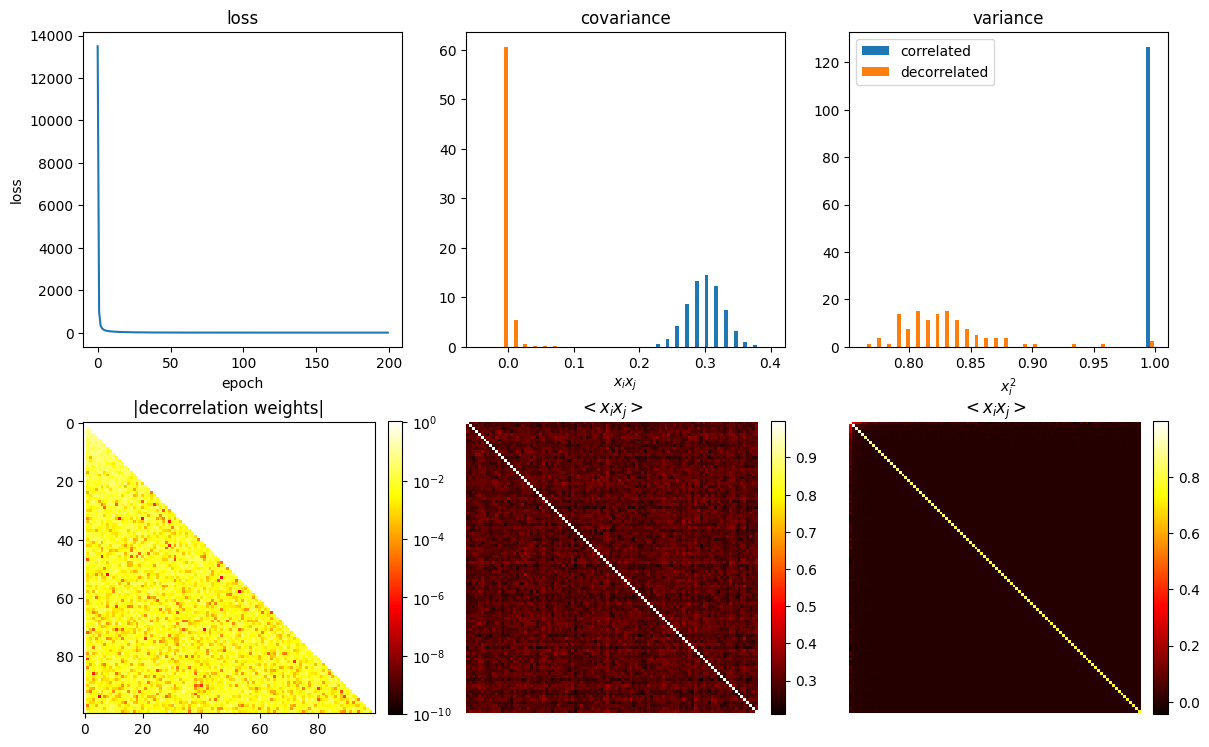

In [ ]:
num_samples=1000
num_features=100
num_epochs=200
seed=42
decor_lr=1e-2
kappa=1e-1

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# generate correlated data
data = generate_correlated_data(num_features, num_samples).to(device)

# create a decorrelator
model = Decorrelation(in_features=num_features, decor_lr=1e-2, kappa=kappa, full=False).to(device)

L, A1, A2 = train(num_epochs, data, model)

plot_decorrelation_results(model, L, A1, A2)
print(f'mean variance: {torch.mean(torch.diag(A2)):.2f}')


Show the impact of debiasing of the data (will have positive effect if weights start to grow during optimization; may allow even higher stable decorrelation learning rates)

epoch 0  	loss: 5.871118
epoch 1  	loss: 0.967263
epoch 2  	loss: 0.385124
epoch 3  	loss: 0.189909
epoch 4  	loss: 0.106040
epoch 5  	loss: 0.064774
epoch 6  	loss: 0.042537
epoch 7  	loss: 0.029714
epoch 8  	loss: 0.021908
epoch 9  	loss: 0.016939
epoch 10 	loss: 0.013654
epoch 11 	loss: 0.011411
epoch 12 	loss: 0.009835
epoch 13 	loss: 0.008700
epoch 14 	loss: 0.007865
epoch 15 	loss: 0.007238
epoch 16 	loss: 0.006760
epoch 17 	loss: 0.006388
epoch 18 	loss: 0.006095
epoch 19 	loss: 0.005861
epoch 20 	loss: 0.005670
epoch 21 	loss: 0.005512
epoch 22 	loss: 0.005379
epoch 23 	loss: 0.005266
epoch 24 	loss: 0.005167
epoch 25 	loss: 0.005079
epoch 26 	loss: 0.005001
epoch 27 	loss: 0.004929
epoch 28 	loss: 0.004862
epoch 29 	loss: 0.004799
epoch 30 	loss: 0.004739
epoch 31 	loss: 0.004682
epoch 32 	loss: 0.004626
epoch 33 	loss: 0.004571
epoch 34 	loss: 0.004518
epoch 35 	loss: 0.004465
epoch 36 	loss: 0.004413
epoch 37 	loss: 0.004361
epoch 38 	loss: 0.004310
epoch 39 	loss: 0.004259


tensor([-0.3352, -0.3736, -0.3295, -0.2954, -0.2229, -0.2151, -0.2936, -0.3396,
        -0.3511, -0.3075, -0.2797, -0.2479, -0.3822, -0.2935, -0.3399, -0.3232,
        -0.2413, -0.3114, -0.2683, -0.2892, -0.2573, -0.2082, -0.3097, -0.2781,
        -0.3697, -0.3064, -0.1716, -0.3341, -0.2979, -0.4008, -0.2882, -0.2748,
        -0.2641, -0.2957, -0.2740, -0.3674, -0.2377, -0.3806, -0.3025, -0.3056,
        -0.3467, -0.2856, -0.3247, -0.2421, -0.3095, -0.2311, -0.3206, -0.3086,
        -0.1508, -0.3874, -0.3423, -0.2791, -0.3119, -0.2904, -0.2634, -0.3064,
        -0.2504, -0.3322, -0.2870, -0.3569, -0.3856, -0.3585, -0.2526, -0.3332,
        -0.3108, -0.2962, -0.2794, -0.2048, -0.2911, -0.2659, -0.2672, -0.2620,
        -0.2630, -0.3828, -0.2490, -0.3079, -0.2154, -0.3791, -0.2145, -0.2780,
        -0.3715, -0.2324, -0.2955, -0.3384, -0.2578, -0.3108, -0.2692, -0.2847,
        -0.4144, -0.3119, -0.2020, -0.2529, -0.3606, -0.4050, -0.3009, -0.2228,
        -0.3882, -0.3149, -0.3254, -0.25

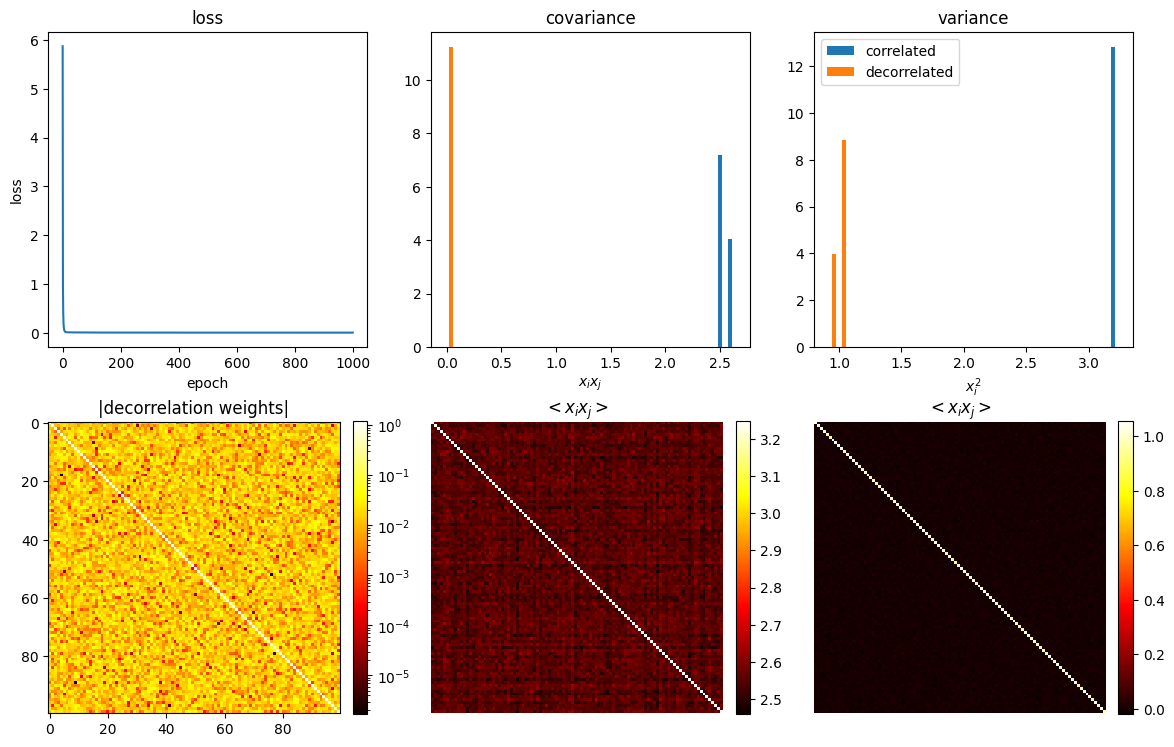

In [ ]:
num_samples=1000
num_features=100
num_epochs=1000
seed=42
decor_lr=1e-1
kappa=1e-1

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# generate correlated data
data = generate_correlated_data(num_features, num_samples).to(device) + 1.5

# create a decorrelator
model = Decorrelation(in_features=num_features, decor_lr=decor_lr, kappa=kappa).to(device)

L, A1, A2 = train(num_epochs, data, model)

plot_decorrelation_results(model, L, A1, A2)
print(f'mean variance: {torch.mean(torch.diag(A2)):.2f}')
model.bias

Shows how offsets lead to huge gradients

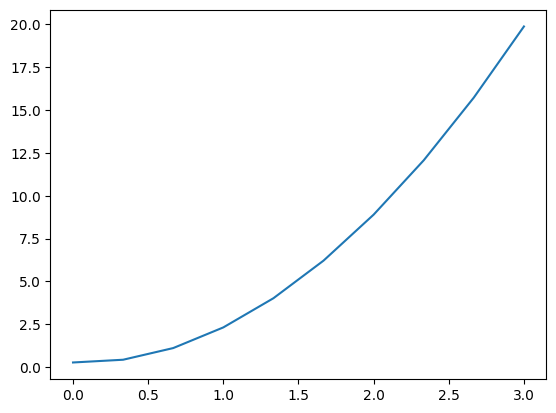

In [ ]:
import copy

num_samples=1000
num_features=100
num_epochs=1000
seed=42
decor_lr=1
kappa=1e-1

offsets = np.linspace(0, 3, 10)

grads = torch.zeros(len(offsets))
for i, offset in enumerate(offsets):

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)

    # generate correlated data
    data = generate_correlated_data(num_features, num_samples).to(device) + offset

    # create a decorrelator
    model = Decorrelation(in_features=num_features, decor_lr=decor_lr, kappa=kappa).to(device)

    w_old = copy.deepcopy(model.weight.data)
    model.forward(data)
    model.update()
    grads[i] = torch.norm(model.weight-w_old)

plt.plot(offsets, grads);

Decorrelation of a convolutional input

epoch 0  	loss: 0.078679
epoch 1  	loss: 0.017476
epoch 2  	loss: 0.007241
epoch 3  	loss: 0.007564
epoch 4  	loss: 0.002514
epoch 5  	loss: 0.003029
epoch 6  	loss: 0.001661
epoch 7  	loss: 0.001555
epoch 8  	loss: 0.002545
epoch 9  	loss: 0.000557
epoch 10 	loss: 0.000346
epoch 11 	loss: 0.000660
epoch 12 	loss: 0.000276
epoch 13 	loss: 0.000141
epoch 14 	loss: 0.000248
epoch 15 	loss: 0.000114
epoch 16 	loss: 0.000682
epoch 17 	loss: 0.000287
epoch 18 	loss: 0.000447
epoch 19 	loss: 0.000120
epoch 20 	loss: 0.000271
epoch 21 	loss: 0.000203
epoch 22 	loss: 0.000340
epoch 23 	loss: 0.000383
epoch 24 	loss: 0.000199
epoch 25 	loss: 0.000118
epoch 26 	loss: 0.000369
epoch 27 	loss: 0.000190
epoch 28 	loss: 0.000439
epoch 29 	loss: 0.000189
epoch 30 	loss: 0.000119
epoch 31 	loss: 0.000255
epoch 32 	loss: 0.000120
epoch 33 	loss: 0.000153
epoch 34 	loss: 0.000159
epoch 35 	loss: 0.000143
epoch 36 	loss: 0.000206
epoch 37 	loss: 0.000176
epoch 38 	loss: 0.000347
epoch 39 	loss: 0.000133


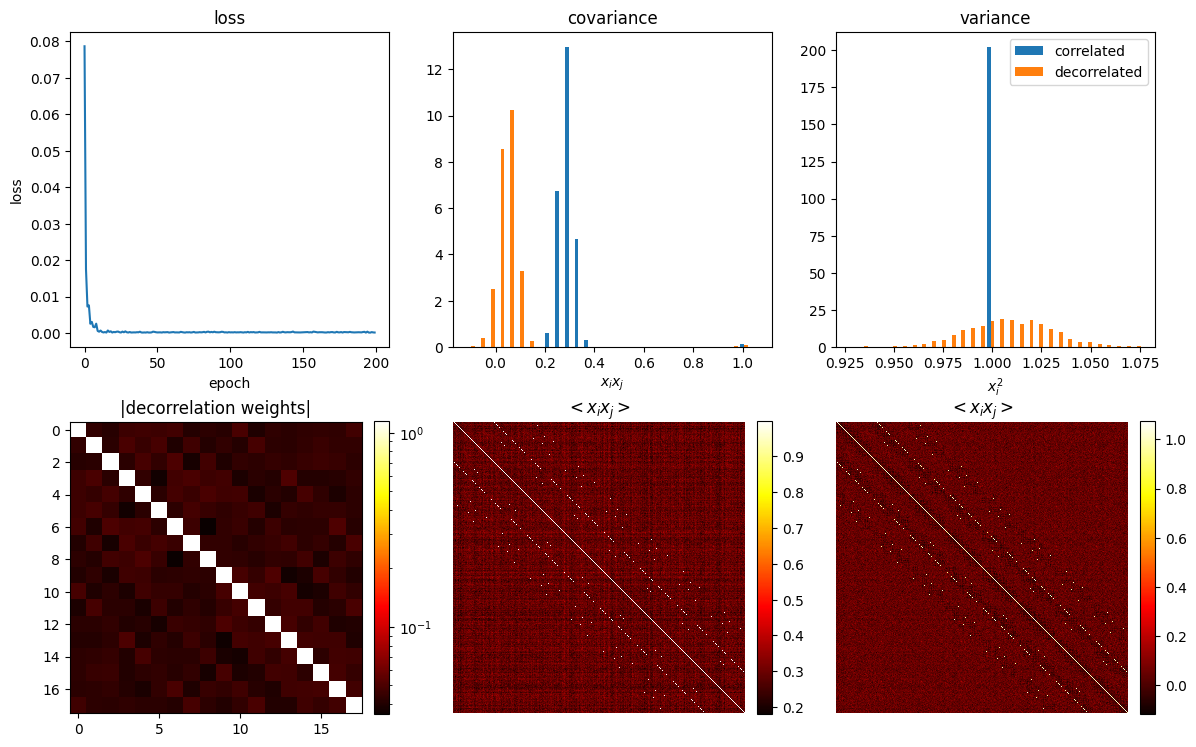

In [ ]:
# generate [N, M] correlated input
in_channels=2
out_channels=3
height=10
width=10
kernel_size=(3,3)
num_samples=1000
num_epochs=200
seed=42
decor_lr=1e-0
kappa=1e-1
downsample_perc=0.1

num_features=in_channels*height*width
size = in_channels * np.prod(kernel_size)

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

data = generate_correlated_data(num_features, num_samples).reshape(num_samples,in_channels,height,width).to(device)

# d = torch.distributions.MultivariateNormal(torch.zeros(num_features), 0.1 * torch.eye(num_features) + 0.9 * torch.ones((num_features, num_features)))
# data = d.sample((num_examples,)).reshape(num_examples,in_channels,height,width).to(device)

# create a convolutional decorrelator
# NOTE: how many samples for effective input decorrelation? Dependence on dim?
# nr of samples instead of perc?
# NOTE: version for immediate non-batched decorrelation...
model = DecorConv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, decor_lr=decor_lr, kappa=kappa, downsample_perc=downsample_perc).to(device)

L, A1, A2 = train(num_epochs, data, model)

plot_decorrelation_results(model, L, A1, A2)
print(f'mean variance: {torch.mean(torch.diag(A2)):.2f}')


Test the effect of downsampling

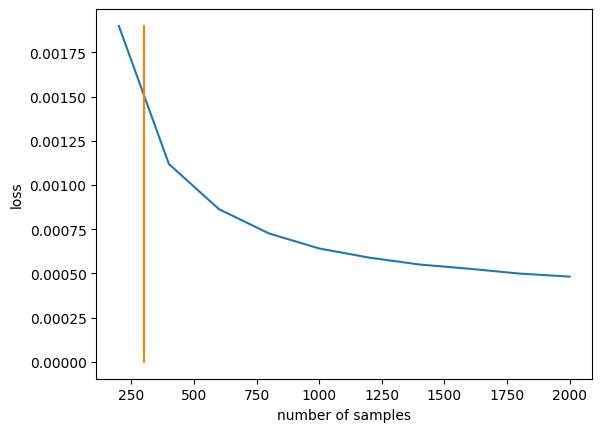

In [ ]:
def compute_decor_sample_size(decor_lr, num_samples, num_features):
    
    num_epochs=50
    seed=42
    
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)

    # generate correlated data
    data = generate_correlated_data(num_features, num_samples).to(device)

    percs = torch.linspace(0.1,1,10)
    L = torch.zeros(len(percs))
    for i, p in enumerate(percs):

        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        np.random.seed(seed)

        model = Decorrelation(in_features=num_features, decor_lr=decor_lr, kappa=0.5).to(device)

        num_samples = int(len(data) * p)
        idx = np.random.choice(np.arange(len(data)), size=num_samples)

        loss = 0
        for j in range(num_epochs):
            model.forward(data[idx])
            loss = model.update()
        
        L[i] = loss

    return L, percs

decor_lr=1e0
num_samples=2000
num_features=300
L, percs = compute_decor_sample_size(decor_lr, num_samples, num_features)

plt.plot(percs*num_samples, L)
plt.plot([num_features, num_features],[0, max(L)])
plt.xlabel('number of samples')
plt.ylabel('loss');

Test impact of decorrelation strength

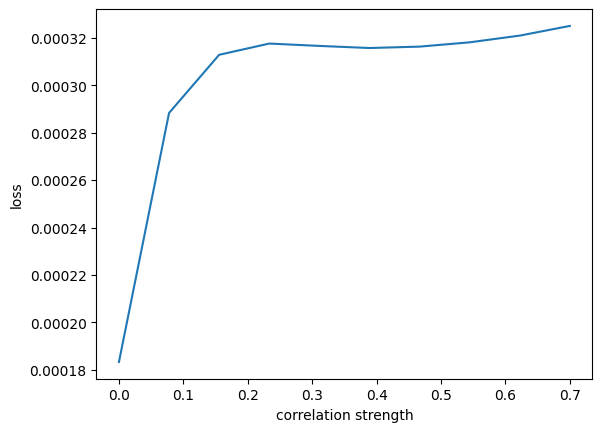

In [ ]:
def compute_decor_strength(decor_lr, num_samples, num_features):
    
    num_epochs=50
    seed=42
    
    percs = torch.linspace(0,0.7,10)
    L = torch.zeros(len(percs))
    for i, p in enumerate(percs):

        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        np.random.seed(seed)

        # generate correlated data
        data = generate_correlated_data(num_features, num_samples, strength=p).to(device)

        model = Decorrelation(in_features=num_features, decor_lr=decor_lr, kappa=0.5).to(device)

        loss = 0
        for j in range(num_epochs):
            model.forward(data)
            loss = model.update()
        
        L[i] = loss

    return L, percs

decor_lr=1e0
num_samples=2000
num_features=300
L, percs = compute_decor_strength(decor_lr, num_samples, num_features)

plt.plot(percs, L)
plt.xlabel('correlation strength')
plt.ylabel('loss');